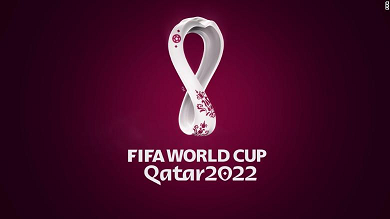




# Objetivo

Simulación para tratar de contestar la pregunta de cuantas figuritas serán necesarias para completar el álbum del Mundial. Este notebook seguramente se volverá más que útil una vez cada cuatro años, en vísperas de una nueva cita mundialista.Uso de simulación para responder a diferentes escenarios acerca de cuántas figuritas hay que comprar para completarlo.

## **Datos:**
1. Álbum con 670 figuritas:
* 32 selecciones clasificadas
* 8 estadios para los partidos
* 5 sedes
* Color de Qatar 2022
* Leyendas
* 50 especiales
2. Cada figurita se imprime en cantidades iguales y se distribuye aleatoriamente.
3. Cada paquete trae cinco figuritas.

# Importar librerias y setear variables generales

In [62]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [63]:
random.seed(123)  #Fijo la semilla para reproducibilidad
figus_total = 670 #Longitud del album
n_repeticiones = 100  #Nro de repeticiones p/simulaciones
figus_paquete = 5 #Nro de figuritas / paquete
n_amigos = 5 #Nro de amigos que cooperan para llenar el album. - un solo nro
group_size = [2,3,5,8,10,15,20,50] #nro de agentes que cooperan - varios

# Algunas funciones para graficar

In [64]:
def plot_one_trial(TITULO, vectorProgresion, nroPaquetesComprados=False):
    ''' Grafica la proporcion de complecion del album.'''
    fig, axes = plt.subplots(figsize=(5,5))
    fig.suptitle(TITULO)
    sns.lineplot(x=range(len(vectorProgresion)), y=vectorProgresion, color="red")
    axes.set_xlabel("N° de paquetes abiertos")
    axes.set_ylabel("N° figuritas obtenidas no repetidas / N° figuritas álbum")
    axes.axhline(y = 1, color = 'black', alpha=0.5, linestyle = '--')

def plot_complecion_simulacion(TITULO, listaVectoresProgresion, n_repeticiones):
    ''' Grafica la proporcion de complecion del album para las n_repeticiones
    de la simulacion.'''

    #Calculo el vector promedio de la progresion de llenado del album.
    promedio_columna = [sum(i) / len(i) for i in zip(*listaVectoresProgresion)]
    fig, axes = plt.subplots(figsize=(5,5))
    for i in range(n_repeticiones):
        sns.lineplot(x=range(len(listaVectoresProgresion[i])), y=listaVectoresProgresion[i], color='gray', alpha=0.05)
    sns.lineplot(x=range(len(promedio_columna)), y=promedio_columna, color='blue')

    fig.suptitle(TITULO)
    axes.set_xlabel("N° de paquetes abiertos")
    axes.set_ylabel("N° figuritas obtenidas no repetidas / N° figuritas álbum")
    axes.axhline(y = 1, color = 'black', alpha=0.5, linestyle = '--')

def plot_boxplot_simulacion(TITULO, listaNroPaquetes, n_repeticiones, n_amigos=0, bineo = 50, cooperar=False):
    ''' Grafica la distribucion del nro de paquetes comprados para las n_repeticiones
    de la simulacion y la media usando un boxplot.
    '''
    listaNroPaquetes = pd.DataFrame(listaNroPaquetes)
    listaNroPaquetes.columns = ['nPaq']
    if cooperar==True:
         listaNroPaquetes['nPaq'] = listaNroPaquetes['nPaq'] / n_amigos

    fig, axes = plt.subplots(figsize=(5,5))
    sns.boxplot(data = listaNroPaquetes, y = "nPaq", color='steelblue',showfliers=False,showmeans=True,
                meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"10"})
    sns.stripplot(data = listaNroPaquetes, y = "nPaq", color='black', dodge=True)
    axes.set_xlabel("")
    axes.set_ylabel("N° paquetes comprados")
    fig.suptitle(TITULO+ f'\n  N° paquetes comprados promedio: {listaNroPaquetes.nPaq.mean()}')
    if cooperar==True:
        fig.suptitle(TITULO+ f'\nN° paquetes comprados promedio TOTALES: {listaNroPaquetes.nPaq.mean()}')
        axes.set_ylabel("N° paquetes comprados")

# Caso 1: llenando un album en solitario, en paquetes que traen una sola figurita


## Funciones útiles para esta sección.



In [65]:
def crear_album(figus_total):
    """Devuelve vector vacio de ceros de longitud figus_total, simbolizando un
    album nuevo y vacio"""
    return np.zeros(figus_total, dtype = int)

def album_incompleto(album):
    """Devuelve True si halla al menos un cero en el vector album, i.e.
    el album no esta completo."""
    for i in album:
        if i==0:
            return True

def comprar_figu(figus_total):
    """Devuelve una figurita sola."""
    return random.randint(0, figus_total - 1)

def cuantas_figus_deAuna(figus_total):
    """
    Que hace
        Genera un album nuevo
        Simula su llenado
        Indica la cantidad de figuritas totales compradas para completarlo,
        cuando las figuritas se han comprado de a una.

    Devuelve:
        Nro de figuritas compradas
        Nro de figuritas repetidas
        Vector de progresion de llenado del album"""
    nroFiguritasCompradas = 0
    album = crear_album(figus_total)
    progreso = [0]

    while album_incompleto(album)==True:
        figurita = comprar_figu(figus_total)
        album[figurita] += 1
        nroFiguritasCompradas  += 1
        progreso.append(np.count_nonzero(album)/figus_total)
    nroFiguritasRepetidas = nroFiguritasCompradas - figus_total

    return nroFiguritasCompradas, nroFiguritasRepetidas, progreso

## Caso 1a - Realizando una sola simulación

Vamos a comenzar nuestro análisis partiendo de un caso ficticio, pero más fácil.

El siguiente gráfico muestra la progresión de compleción del álbum a medida que se van abriendo los sobres (que en este caso contienen una figurita únicamente). Se ve éste se completa superando los 5000 sobres y que la dinámica es asintótica. Esto tiene lógica puesto que al inicio, con el álbum vacío, cualquier figurita que venga en un sobre nos servirá, pero a medida que lo vamos completando, sube el número de repetidas.

Se completó el álbum con 3796 figuritas


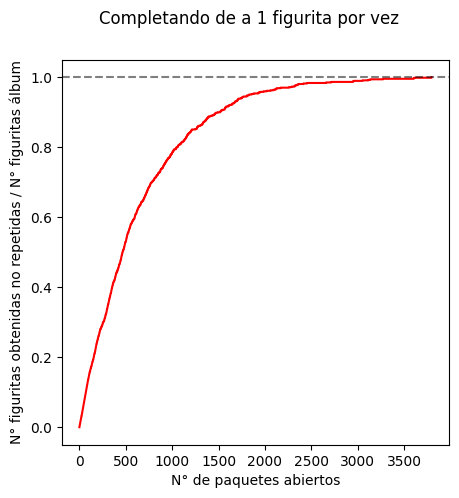

In [66]:
nroFiguritasCompradas, nroFiguritasRepetidas, progreso_de_a_una = cuantas_figus_deAuna(figus_total)
plot_one_trial("Completando de a 1 figurita por vez", progreso_de_a_una)
print(f"Se completó el álbum con {nroFiguritasCompradas} figuritas")

## Caso 1b - 100 simulaciones

¿Qué sucedería si el experimento recién planteado se repite un número grande de veces? Es decir, ¿siempre necesitaremos mas de 5000 paquetes?

Vemos que si repetimos 100 veces el experimento, la dinámica simil logarítmica se mantiene, pero tenemos una mejor estimación del número de sobres necesarios.

El N° sobres con 1 figurita cada uno fue de:  4713.98


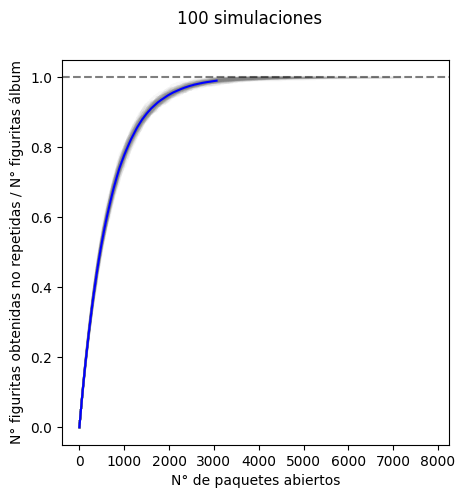

In [67]:
nroFiguritasCompradas_de_a_una = []
simulaciones_de_a_una = []
for i in range(n_repeticiones):
    nroFiguritasCompradas,_, progre = cuantas_figus_deAuna(figus_total)
    simulaciones_de_a_una.append(progre)
    nroFiguritasCompradas_de_a_una.append(nroFiguritasCompradas)
plot_complecion_simulacion(f'{n_repeticiones} simulaciones', simulaciones_de_a_una, n_repeticiones)

print("El N° sobres con 1 figurita cada uno fue de: ", np.mean(nroFiguritasCompradas_de_a_una))

# Caso 2: completando el álbum con paquetes de a 5 figuritas cada uno.

## Funciones útiles para esta sección.


In [68]:
def comprar_paquete(figus_total, figus_paquete):
    """
    Que hace
        Devuelve vector simulando un paquete de figus_paquete figuritas.
    Obs.
        Pueden haber figuritas repetidas dentro de un paquete.
    """
    paquete = np.zeros(figus_paquete, dtype = int)
    for i in range(figus_paquete):
        figurita = random.randint(0, figus_total - 1)
        paquete[i] = figurita
    return paquete


def cuantos_paquetes(figus_total, figus_paquete, universoFiguritas=[], dificiles=False):
    """
    Que hace
        Genera un album nuevo
        Simula su llenado
        Indica la cantidad de paquetes de dimension figus_paquete totales necesarios para
        completarlo.
    Devuelve
        El nro de paquetes comprados para llenar el album
        Vector de progresion de llenado del album
    Obs.
        Argumento optativo que genera paquetes con figus dificiles. Por default, False.
    """
    album = crear_album(figus_total)
    nroPaquetesComprados = 0 #Contador paquetes comprados.
    progreso = [0]

    while album_incompleto(album)==True:
        if dificiles==True:
            paquete = comprar_paquete_con_dificiles(figus_total, figus_paquete, universoFiguritas)
        else:
            paquete = comprar_paquete(figus_total, figus_paquete)
        for figu in paquete:
            album[figu] += 1
        nroPaquetesComprados  += 1
        progreso.append(np.count_nonzero(album)/figus_total) #Acumulo la proporcion de album completado con cada iteracion.

    return nroPaquetesComprados, progreso

## Caso 2a - Realizando una sola simulación

Pasamos ahora a una situación más real, donde las figuritas vienen en sobres de a cinco. ¿Qué sucede en este caso? Necesitamos alrededor de 1000 sobres para lograr completar el álbum.

Se completó el álbum con 1358 sobres.


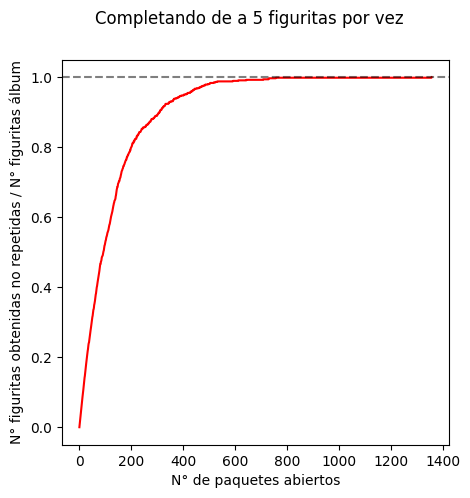

In [69]:
paquetesComprados, progreso_de_a_cinco = cuantos_paquetes(figus_total, figus_paquete)
plot_one_trial("Completando de a 5 figuritas por vez", progreso_de_a_cinco, paquetesComprados)
print(f"Se completó el álbum con {paquetesComprados} sobres.")

## Caso 2b - 100 simulaciones

Al igual que antes nos preguntamos el resultado de repetir el experimento más de una vez. Vemos que necesitamos alrededor de 900 paquetes en promedio, para llenar el álbum. En este punto agregamos un gráfico adicional (boxplot) con el resultado de cada simulación (punto = media, linea dentro de la caja = mediana).

El nro sobres con 5 figuritas cada uno fue de:  966.17


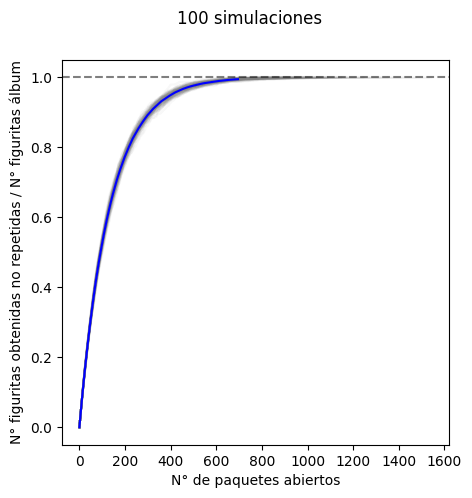

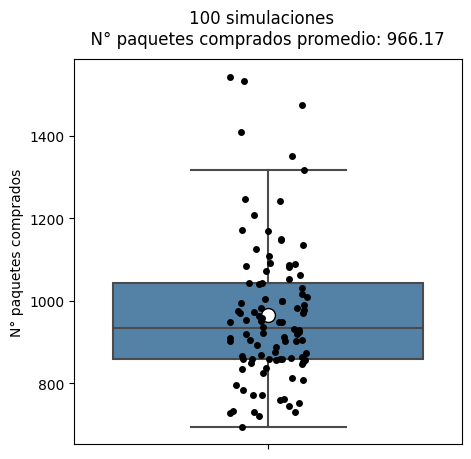

In [70]:
n_paquetes_adquiridos = []
simulaciones_de_a_cinco = []
for i in range(n_repeticiones):
    nroPaquetesComprados, progre = cuantos_paquetes(figus_total, figus_paquete)
    simulaciones_de_a_cinco.append(progre)
    n_paquetes_adquiridos.append(nroPaquetesComprados)
plot_complecion_simulacion("100 simulaciones", simulaciones_de_a_cinco, n_repeticiones)
plot_boxplot_simulacion("100 simulaciones", n_paquetes_adquiridos, n_repeticiones, bineo = 50)

print("El nro sobres con 5 figuritas cada uno fue de: ", np.mean(n_paquetes_adquiridos))

# Caso 3: Completando el álbum con sobres de a 5, en solitario, con figuritas difíciles.

El caso 2 fue realista, pero ¿podemos ir un paso más allá?

Sospechamos que el Sr. Panini no imprime en la misma proporcion todas las figuritas. Es decir, que hay algunas a las que llamamos dificiles (probablemente sean de estadios, capitanes de equipos o fotos del equipo completo).


*Nota*: suponemos que nDificiles = 30 de las 670 figuritas son dificiles, y que dificiles significa que la relacion es factor : 1. Es decir que hay 670 - nDificiles figuritas que estan representadas factor veces mas que las otras 30.



## Funciones y variables para esta sección

In [71]:
nDificiles = 30
factor = 2
figusComunes = [*range(0,figus_total - nDificiles)]*factor
figusDificiles = [*range( figus_total-nDificiles, figus_total)]
universoFiguritas = figusComunes + figusDificiles

def comprar_paquete_con_dificiles(figus_total, figus_paquete, universoFiguritas):
    """
    Que hace
        Devuelve vector simulando un paquete de figus_paquete figuritas.
    """
    paquete_dif = np.zeros(figus_paquete, dtype = int)
    for i in range(figus_paquete):
        paquete_dif = random.choices(universoFiguritas, k=5)
    return paquete_dif

## 100 simulaciones con difíciles

Realizamos de manera directa las 100 simulaciones del experimento. En el caso de existir figuritas difíciles, vemos que el número de paquetes encesarios para llenar el álbum, como era de esperar, aumenta.

El N° sobres con 5 figurita c/ dificiles:  1087.21


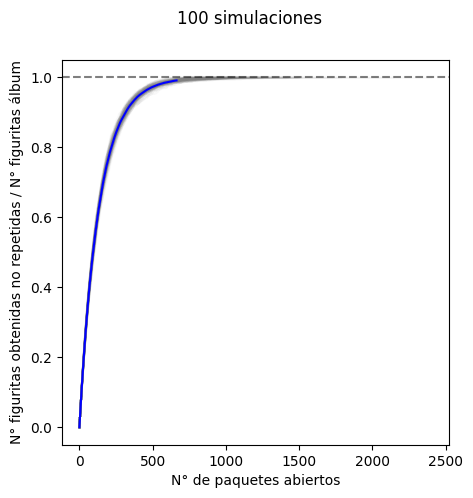

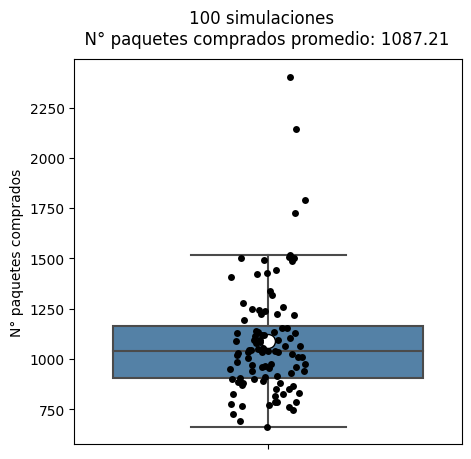

In [72]:
n_paquetes_c_dificiles = []
simulaciones_c_dificiles = []
for i in range(n_repeticiones):
    nroPaquetesComprados, progre = cuantos_paquetes(figus_total, figus_paquete,  universoFiguritas, True)
    simulaciones_c_dificiles.append(progre)
    n_paquetes_c_dificiles.append(nroPaquetesComprados)
plot_complecion_simulacion(f'100 simulaciones', simulaciones_c_dificiles, n_repeticiones)
plot_boxplot_simulacion(f'100 simulaciones', n_paquetes_c_dificiles, n_repeticiones,  bineo = 50)

print("El N° sobres con 5 figurita c/ dificiles: ", np.mean(n_paquetes_c_dificiles))

# Caso 4: completando el álbum de a 5 amigos

Vamos a aproximarnos un poco más a la realidad, en este último paso, donde los aspirantes a completar su álbum no lo hacen de manera solitaria sino que se reúnen y cooperan para intercambiar figuritas y así completarlo mas rápidamente.

Es decir, podríamos preguntarnos si conviene cooperar que competir/jugar en solitario.

In [73]:
def album_incompleto_colab(album, n_amigos):
    """Devuelve True si halla que no todas las posiciones del album tienen n_amigos figuritas."""
    for i in album:
        if i < n_amigos:
            return True

def cuantos_paquetes_colab(figus_total, figus_paquete, n_amigos):
    """
    Que hace
        Genera y simula el llenado de un album que ahora para estar completo tiene que
        tener n_amigos figuritas en vez de una sola, porque cooperan.
        Indica la cantidad de paquetes totales necesarios para completarlos.
    Devuelve
        Nro de paquetes que se debieron comprar
        Progresion de complecion de los n_amigos albumes"""

    album = crear_album(figus_total)
    nroPaquetesComprados = 0 #Contador paquetes comprados.
    progreso = [0]

    while album_incompleto_colab(album, n_amigos)==True:
        paquete = comprar_paquete(figus_total, figus_paquete)
        for figu in paquete:
            album[figu] += 1
        nroPaquetesComprados  += 1
        progreso.append(np.count_nonzero(album)/figus_total)

    return nroPaquetesComprados, progreso

## 100 simulaciones cooperando

Al correr esta simulación se puede ver que si se juntan 5 amigos, para llenar los 5 álbumes se necesitan alrededor de 400 sobres, es decir que cada amigo debería aportar en promedio, 80.

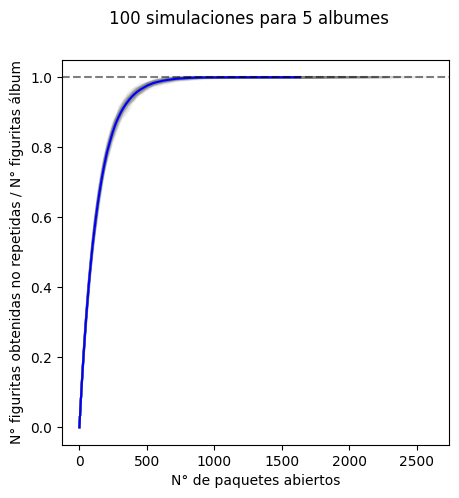

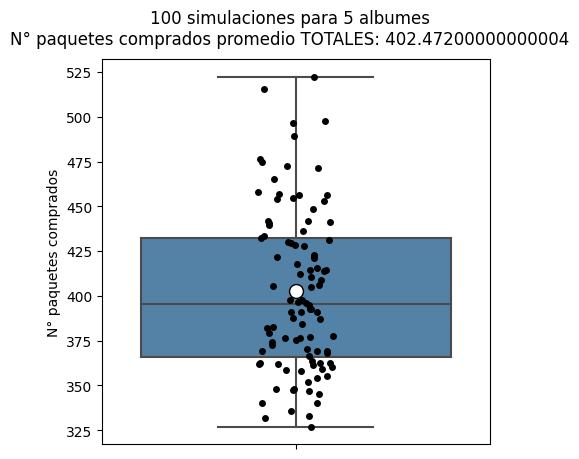

In [74]:
def simular_cooperacion(figus_total, figus_paquete, n_amigos,n_repeticiones, showPlots=True):
    '''
    Corre una simulacion del llenado de un algum de figus_total figuritas, con figus_paquete
    figuritas por paquete y la cooperacion de n_amigos, n_repeticiones veces.
    '''
    n_paquetes_adquiridos_colab = []
    simulaciones_de_a_cinco_colab = []
    for i in range(n_repeticiones):
        nPaq_colab, progreso_colab =  cuantos_paquetes_colab(figus_total, figus_paquete, n_amigos)
        simulaciones_de_a_cinco_colab .append(progreso_colab)
        n_paquetes_adquiridos_colab.append(nPaq_colab)
    if showPlots == True:
        plot_complecion_simulacion(f'100 simulaciones para {n_amigos} albumes', simulaciones_de_a_cinco_colab , n_repeticiones)
        plot_boxplot_simulacion(f'100 simulaciones para {n_amigos} albumes', n_paquetes_adquiridos_colab, n_repeticiones, n_amigos, 50, True)
    return n_paquetes_adquiridos_colab, simulaciones_de_a_cinco_colab

_,_ = simular_cooperacion(figus_total, figus_paquete, n_amigos, n_repeticiones, True)

# Bonus track

Como extra, nos podemos preguntar cómo varía el efecto de agruparse/cooperar en función del tamaño del grupo. Realicemos la simulación con un número creciente de amigos que se juntan para llenar sus álbumes.

In [75]:
def simular_cooperacion_varios(group_size):
    '''
    Que hace
        Grafica el promedio de figuritas necesarias por album, cuando hay varios agentes
        cooperando para llenar el suyo.
    '''
    datos = []
    for i in group_size:
        nPaq, _ = simular_cooperacion(figus_total, figus_paquete, i, n_repeticiones, False)
        #Calculo los vectores relativos dividiendo por el nro de participantes para comparar desp por album y no el total
        nPaq_rel = [k/i for k in nPaq]

        datos.append({
            'n_repeticiones': n_repeticiones,
            'group_size': str(i),
            'nPaq_rel': nPaq_rel
            })

    data = pd.DataFrame(columns = ['group_size', 'nPaq_rel'])
    for j in range(len(datos)):
        group_size = datos[j]['group_size']
        valores = datos[j]['nPaq_rel']
        for k in valores:
            data.loc[len(data.index)] = [group_size,k]

    TITULO = f'100 simulaciones'
    fig, axes = plt.subplots(figsize=(5,5))
    fig.suptitle(TITULO)
    sns.boxplot(ax=axes, showfliers=False, data = data, x="group_size", y='nPaq_rel')
    sns.stripplot(ax=axes, data = data, x="group_size", y='nPaq_rel', color= 'black', jitter=0.1, dodge=True)
    axes.set_xlabel('Tamaño del grupo')
    axes.set_ylabel('N° de paquetes hasta completar el album')
    handles, labels = axes.get_legend_handles_labels()

El siguiente gráfico muestra un boxplot para cada grupo de amigos (que se junta de a 2, de a 3, de a 5, etcétera). Podemos ver notoriamente el efecto de cooperar con cada vez más personas, donde se ve un salto cualitativo en el número de sobres necesarios a partir de los 8 amigos.

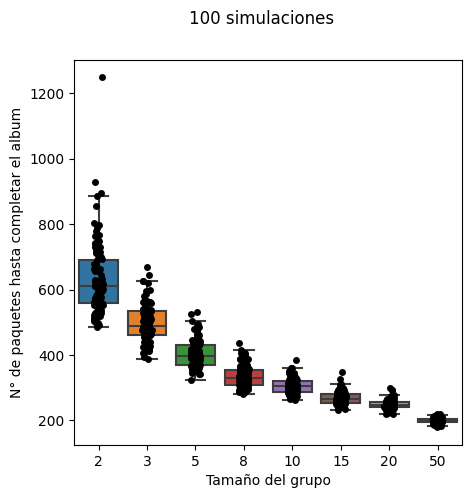

In [76]:
simular_cooperacion_varios(group_size)